In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chili-plant-disease/val/yellowish/yellowish09.jpg
/kaggle/input/chili-plant-disease/val/yellowish/yellowish22 (1).jpg
/kaggle/input/chili-plant-disease/val/yellowish/yellowish11 (1).jpg
/kaggle/input/chili-plant-disease/val/yellowish/yellowish12.jpg
/kaggle/input/chili-plant-disease/val/yellowish/yellowish24.jpg
/kaggle/input/chili-plant-disease/val/yellowish/yellowish07.jpg
/kaggle/input/chili-plant-disease/val/yellowish/yellowish16.jpg
/kaggle/input/chili-plant-disease/val/yellowish/yellowish09 (1).jpg
/kaggle/input/chili-plant-disease/val/yellowish/yellowish08 (1).jpg
/kaggle/input/chili-plant-disease/val/yellowish/yellowish18 (1).jpg
/kaggle/input/chili-plant-disease/val/healthy/Cabai sehat098.jpg
/kaggle/input/chili-plant-disease/val/healthy/Cabai sehat076.jpg
/kaggle/input/chili-plant-disease/val/healthy/Cabai sehat080.jpg
/kaggle/input/chili-plant-disease/val/healthy/Cabai sehat078.jpg
/kaggle/input/chili-plant-disease/val/healthy/Cabai sehat056.jpg
/kaggle/input/c

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, BatchNormalization, Reshape
from sklearn.metrics import accuracy_score
from keras.optimizers import RMSprop,Adam

2024-09-13 07:51:58.024781: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-13 07:51:58.024988: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-13 07:51:58.189763: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import io
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report,accuracy_score, recall_score, precision_score, f1_score

In [4]:
X_trainc = []
Y_trainc = []
image_sizec = 150
labelsc = ['healthy', 'leaf curl', 'leaf spot', 'whitefly','yellowish']
for i in labelsc:
    folderPathc = os.path.join('/kaggle/input/chili-plant-disease/train', i)
    for j in os.listdir(folderPathc):
        imgc = cv2.imread(os.path.join(folderPathc, j))
        imgc = cv2.resize(imgc, (image_sizec, image_sizec))
        X_trainc.append(imgc)
        Y_trainc.append(i)
        

X_testc = []
Y_testc = []        
for i in labelsc:
    folderPathc1 = os.path.join('/kaggle/input/chili-plant-disease/test', i)
    for j in os.listdir(folderPathc1):
        imgc = cv2.imread(os.path.join(folderPathc1, j))
        imgc = cv2.resize(imgc, (image_sizec, image_sizec))
        X_testc.append(imgc)
        Y_testc.append(i)
        
X_valc = []
Y_valc = []        
for i in labelsc:
    folderPathc2 = os.path.join('/kaggle/input/chili-plant-disease/val', i)
    for j in os.listdir(folderPathc2):
        imgc = cv2.imread(os.path.join(folderPathc2, j))
        imgc = cv2.resize(imgc, (image_sizec, image_sizec))
        X_valc.append(imgc)
        Y_valc.append(i)      
        
X_trainc = np.array(X_trainc)
Y_trainc = np.array(Y_trainc)
X_testc = np.array(X_testc)
Y_testc = np.array(Y_testc)
X_valc = np.array(X_valc)
Y_valc = np.array(Y_valc)

In [5]:
X_trainc, Y_trainc = shuffle(X_trainc, Y_trainc, random_state=101)
X_trainc.shape

(400, 150, 150, 3)

In [6]:
X_testc, Y_testc = shuffle(X_testc, Y_testc, random_state=101)
X_testc.shape

(50, 150, 150, 3)

In [7]:
X_valc, Y_valc = shuffle(X_valc, Y_valc, random_state=101)
X_valc.shape

(50, 150, 150, 3)

In [8]:
label_mapping = {'healthy': 0, 'leaf curl': 1, 'leaf spot': 2, 'whitefly': 3, 'yellowish' : 4}
Y_test_intc = [label_mapping[label] for label in Y_testc]
Y_val_intc = [label_mapping[label] for label in Y_valc]
Y_train_intc = [label_mapping[label] for label in Y_trainc]


In [9]:
Y_train_encodedc = to_categorical(Y_train_intc, num_classes=5)
Y_val_encodedc = to_categorical(Y_val_intc, num_classes=5)
Y_test_encodedc = to_categorical(Y_test_intc, num_classes=5)

In [10]:
Y_train_new = []
for i in Y_trainc:
    Y_train_new.append(labelsc.index(i))
Y_trainc=Y_train_new
Y_trainc = tf.keras.utils.to_categorical(Y_trainc)

Y_test_new = []
for i in Y_testc:
    Y_test_new.append(labelsc.index(i))
Y_testc=Y_test_new
Y_testc = tf.keras.utils.to_categorical(Y_testc)

Y_val_new = []
for i in Y_valc:
    Y_val_new.append(labelsc.index(i))
Y_valc=Y_train_new
Y_valc= tf.keras.utils.to_categorical(Y_valc)


In [11]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(2, 2), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(2, 2), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(700, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 149, 149, 16)   │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 149, 149, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 73, 73, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 73, 73, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 35, 35, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 35, 35, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 700)            │       807,100 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 871,709 (3.33 MB)

 Trainable params: 871,101 (3.32 MB)

 Non-trainable params: 608 (2.38 KB)

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

In [14]:
history = model.fit(X_trainc, Y_train_encodedc, epochs=20, batch_size=40, verbose=2, validation_data=(X_valc, Y_val_encodedc), shuffle=True)

Epoch 1/20
10/10 - 12s - 1s/step - accuracy: 0.2750 - loss: 3.3789 - val_accuracy: 0.2000 - val_loss: 4.8065
Epoch 2/20
10/10 - 7s - 696ms/step - accuracy: 0.4100 - loss: 1.8859 - val_accuracy: 0.2000 - val_loss: 2.8170
Epoch 3/20
10/10 - 7s - 666ms/step - accuracy: 0.3925 - loss: 1.7591 - val_accuracy: 0.2000 - val_loss: 1.7597
Epoch 4/20
10/10 - 11s - 1s/step - accuracy: 0.4500 - loss: 1.6418 - val_accuracy: 0.2400 - val_loss: 1.4489
Epoch 5/20
10/10 - 7s - 671ms/step - accuracy: 0.4650 - loss: 1.4832 - val_accuracy: 0.3800 - val_loss: 1.3791
Epoch 6/20
10/10 - 7s - 680ms/step - accuracy: 0.5025 - loss: 1.4635 - val_accuracy: 0.4200 - val_loss: 1.3270
Epoch 7/20
10/10 - 7s - 659ms/step - accuracy: 0.5075 - loss: 1.3182 - val_accuracy: 0.4400 - val_loss: 1.3026
Epoch 8/20
10/10 - 6s - 646ms/step - accuracy: 0.5150 - loss: 1.3141 - val_accuracy: 0.4600 - val_loss: 1.2973
Epoch 9/20
10/10 - 10s - 1s/step - accuracy: 0.5350 - loss: 1.2382 - val_accuracy: 0.4400 - val_loss: 1.2829
Epoch 1

In [15]:
precc1 = model.predict(X_valc)
prec_labc1= np.argmax(precc1, axis=1)
precic1 = precision_score(Y_val_intc, prec_labc1, average='weighted')
recallc1 = recall_score(Y_val_intc, prec_labc1, average='weighted')
f1c1 = f1_score(Y_val_intc, prec_labc1, average='weighted')
cmc1 = confusion_matrix(Y_val_intc, prec_labc1)
print(cmc1)
accuracy1 = accuracy_score(Y_val_intc, prec_labc1)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step
[[3 5 0 2 0]
 [1 3 1 5 0]
 [0 0 1 7 2]
 [0 1 1 8 0]
 [0 6 0 1 3]]


In [16]:
history1 = model.fit(X_trainc, Y_train_encodedc, epochs=20, batch_size=40, verbose=2, validation_data=(X_valc, Y_val_encodedc), shuffle=True)

Epoch 1/20
10/10 - 7s - 718ms/step - accuracy: 0.6650 - loss: 0.9181 - val_accuracy: 0.3800 - val_loss: 1.3542
Epoch 2/20
10/10 - 7s - 659ms/step - accuracy: 0.6325 - loss: 0.9165 - val_accuracy: 0.4000 - val_loss: 1.3910
Epoch 3/20
10/10 - 7s - 662ms/step - accuracy: 0.6225 - loss: 0.9003 - val_accuracy: 0.4200 - val_loss: 1.2561
Epoch 4/20
10/10 - 6s - 643ms/step - accuracy: 0.6775 - loss: 0.8437 - val_accuracy: 0.4200 - val_loss: 1.3085
Epoch 5/20
10/10 - 7s - 653ms/step - accuracy: 0.6475 - loss: 0.8890 - val_accuracy: 0.3600 - val_loss: 1.3596
Epoch 6/20
10/10 - 7s - 696ms/step - accuracy: 0.6750 - loss: 0.8400 - val_accuracy: 0.3800 - val_loss: 1.3306
Epoch 7/20
10/10 - 6s - 646ms/step - accuracy: 0.6400 - loss: 0.9013 - val_accuracy: 0.4000 - val_loss: 1.3222
Epoch 8/20
10/10 - 10s - 1s/step - accuracy: 0.6825 - loss: 0.8061 - val_accuracy: 0.3800 - val_loss: 1.3772
Epoch 9/20
10/10 - 11s - 1s/step - accuracy: 0.6750 - loss: 0.8113 - val_accuracy: 0.3800 - val_loss: 1.3418
Epoch

In [17]:
precc2 = model.predict(X_valc)
prec_labc2= np.argmax(precc2, axis=1)
precic2 = precision_score(Y_val_intc, prec_labc2, average='weighted')
recallc2 = recall_score(Y_val_intc, prec_labc2, average='weighted')
f1c2 = f1_score(Y_val_intc, prec_labc2, average='weighted')
cmc2 = confusion_matrix(Y_val_intc, prec_labc2)
print(cmc2)
accuracy2 = accuracy_score(Y_val_intc, prec_labc2)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[4 4 0 2 0]
 [0 5 0 5 0]
 [0 1 1 7 1]
 [0 1 0 9 0]
 [0 7 1 0 2]]


In [18]:
history2 = model.fit(X_trainc, Y_train_encodedc, epochs=20, batch_size=40, verbose=2, validation_data=(X_valc, Y_val_encodedc), shuffle=True)

Epoch 1/20
10/10 - 7s - 669ms/step - accuracy: 0.7350 - loss: 0.6786 - val_accuracy: 0.4200 - val_loss: 1.3067
Epoch 2/20
10/10 - 7s - 720ms/step - accuracy: 0.7450 - loss: 0.6795 - val_accuracy: 0.4000 - val_loss: 1.3188
Epoch 3/20
10/10 - 7s - 651ms/step - accuracy: 0.7725 - loss: 0.6143 - val_accuracy: 0.4600 - val_loss: 1.2677
Epoch 4/20
10/10 - 7s - 660ms/step - accuracy: 0.7175 - loss: 0.6521 - val_accuracy: 0.4400 - val_loss: 1.3085
Epoch 5/20
10/10 - 7s - 660ms/step - accuracy: 0.7450 - loss: 0.6253 - val_accuracy: 0.4400 - val_loss: 1.2456
Epoch 6/20
10/10 - 11s - 1s/step - accuracy: 0.7900 - loss: 0.5824 - val_accuracy: 0.4600 - val_loss: 1.2187
Epoch 7/20
10/10 - 10s - 976ms/step - accuracy: 0.7450 - loss: 0.6153 - val_accuracy: 0.4600 - val_loss: 1.3027
Epoch 8/20
10/10 - 7s - 653ms/step - accuracy: 0.7400 - loss: 0.6464 - val_accuracy: 0.4200 - val_loss: 1.4315
Epoch 9/20
10/10 - 7s - 659ms/step - accuracy: 0.7475 - loss: 0.6152 - val_accuracy: 0.4400 - val_loss: 1.4042
Ep

In [19]:
precc3 = model.predict(X_valc)
prec_labc3= np.argmax(precc3, axis=1)
precic3 = precision_score(Y_val_intc, prec_labc3, average='weighted')
recallc3 = recall_score(Y_val_intc, prec_labc3, average='weighted')
f1c3 = f1_score(Y_val_intc, prec_labc3, average='weighted')
cmc3 = confusion_matrix(Y_val_intc, prec_labc3)
print(cmc3)
accuracy3 = accuracy_score(Y_val_intc, prec_labc3)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[[5 3 0 2 0]
 [0 5 0 5 0]
 [0 0 2 6 2]
 [0 0 1 9 0]
 [0 6 0 0 4]]


In [20]:
history3 = model.fit(X_trainc, Y_train_encodedc, epochs=20, batch_size=40, verbose=2, validation_data=(X_valc, Y_val_encodedc), shuffle=True)

Epoch 1/20
10/10 - 7s - 679ms/step - accuracy: 0.8300 - loss: 0.4729 - val_accuracy: 0.4800 - val_loss: 1.3700
Epoch 2/20
10/10 - 10s - 1s/step - accuracy: 0.8525 - loss: 0.4237 - val_accuracy: 0.5000 - val_loss: 1.4689
Epoch 3/20
10/10 - 10s - 1s/step - accuracy: 0.8050 - loss: 0.4736 - val_accuracy: 0.5000 - val_loss: 1.4802
Epoch 4/20
10/10 - 7s - 679ms/step - accuracy: 0.8175 - loss: 0.4795 - val_accuracy: 0.4400 - val_loss: 1.3331
Epoch 5/20
10/10 - 10s - 1s/step - accuracy: 0.8300 - loss: 0.4530 - val_accuracy: 0.4600 - val_loss: 1.4165
Epoch 6/20
10/10 - 11s - 1s/step - accuracy: 0.8425 - loss: 0.4593 - val_accuracy: 0.4400 - val_loss: 1.3204
Epoch 7/20
10/10 - 10s - 964ms/step - accuracy: 0.8375 - loss: 0.4605 - val_accuracy: 0.5200 - val_loss: 1.3110
Epoch 8/20
10/10 - 10s - 1s/step - accuracy: 0.8300 - loss: 0.4612 - val_accuracy: 0.4800 - val_loss: 1.4096
Epoch 9/20
10/10 - 11s - 1s/step - accuracy: 0.8475 - loss: 0.4296 - val_accuracy: 0.5200 - val_loss: 1.5032
Epoch 10/20


In [21]:
precc4 = model.predict(X_valc)
prec_labc4= np.argmax(precc4, axis=1)
precic4 = precision_score(Y_val_intc, prec_labc4, average='weighted')
recallc4 = recall_score(Y_val_intc, prec_labc4, average='weighted')
f1c4 = f1_score(Y_val_intc, prec_labc4, average='weighted')
cmc4 = confusion_matrix(Y_val_intc, prec_labc4)
print(cmc4)
accuracy4 = accuracy_score(Y_val_intc, prec_labc4)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[5 3 1 1 0]
 [1 4 0 5 0]
 [0 0 4 5 1]
 [0 0 2 8 0]
 [1 3 0 0 6]]


In [22]:
history4 = model.fit(X_trainc, Y_train_encodedc, epochs=20, batch_size=40, verbose=2, validation_data=(X_valc, Y_val_encodedc), shuffle=True)

Epoch 1/20
10/10 - 7s - 725ms/step - accuracy: 0.8650 - loss: 0.3697 - val_accuracy: 0.5400 - val_loss: 1.3979
Epoch 2/20
10/10 - 7s - 673ms/step - accuracy: 0.8550 - loss: 0.4059 - val_accuracy: 0.5600 - val_loss: 1.3401
Epoch 3/20
10/10 - 10s - 996ms/step - accuracy: 0.8750 - loss: 0.3564 - val_accuracy: 0.5600 - val_loss: 1.3829
Epoch 4/20
10/10 - 7s - 671ms/step - accuracy: 0.8475 - loss: 0.4024 - val_accuracy: 0.5000 - val_loss: 1.4975
Epoch 5/20
10/10 - 11s - 1s/step - accuracy: 0.8950 - loss: 0.3187 - val_accuracy: 0.4800 - val_loss: 1.4881
Epoch 6/20
10/10 - 7s - 668ms/step - accuracy: 0.8800 - loss: 0.3385 - val_accuracy: 0.4800 - val_loss: 1.4795
Epoch 7/20
10/10 - 7s - 662ms/step - accuracy: 0.8750 - loss: 0.3237 - val_accuracy: 0.5200 - val_loss: 1.3883
Epoch 8/20
10/10 - 7s - 667ms/step - accuracy: 0.9075 - loss: 0.2761 - val_accuracy: 0.5400 - val_loss: 1.4055
Epoch 9/20
10/10 - 7s - 667ms/step - accuracy: 0.8875 - loss: 0.3016 - val_accuracy: 0.5400 - val_loss: 1.3580
Ep

In [23]:
precc5 = model.predict(X_valc)
prec_labc5= np.argmax(precc5, axis=1)
precic5 = precision_score(Y_val_intc, prec_labc5, average='weighted')
recallc5 = recall_score(Y_val_intc, prec_labc5, average='weighted')
f1c5 = f1_score(Y_val_intc, prec_labc5, average='weighted')
cmc5 = confusion_matrix(Y_val_intc, prec_labc5)
print(cmc5)
accuracy5 = accuracy_score(Y_val_intc, prec_labc5)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[[5 3 0 2 0]
 [1 3 0 5 1]
 [0 1 4 5 0]
 [0 0 2 8 0]
 [0 6 0 0 4]]


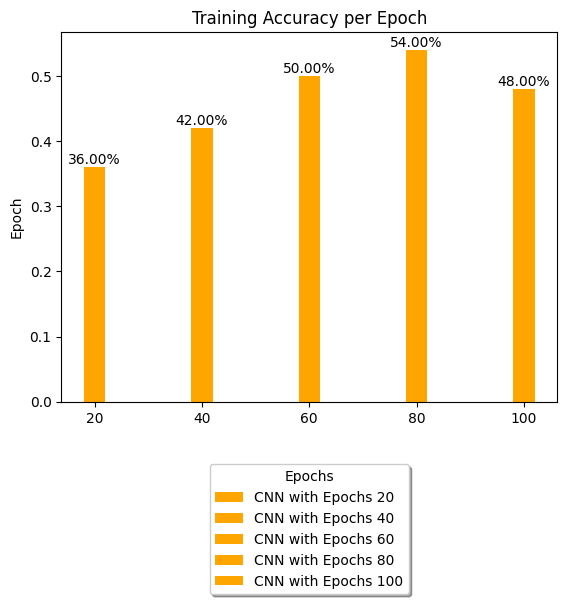

In [24]:
fig, ax = plt.subplots()
accu_all = [accuracy1,accuracy2,accuracy3,accuracy4,accuracy5]
epochs = ['20', '40', '60', '80','100']
bar_labels = ['CNN with Epochs 20', 'CNN with Epochs 40', 'CNN with Epochs 60', 'CNN with Epochs 80', 'CNN with Epochs 100']
bar_colors = ['orange', 'orange', 'orange', 'orange','orange']
ax.bar(epochs, accu_all, label=bar_labels, color=bar_colors,width=0.2)
ax.set_ylabel('Accuracy')
ax.set_ylabel('Epoch')
ax.set_title('Training Accuracy per Epoch')
ax.legend(title='Epochs', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=1)
for i, ac in enumerate(accu_all):
    plt.text(epochs[i], ac, f'{ac:.2%}', ha='center', va='bottom')
plt.show()
# train_acc = (history.history['accuracy'], history1.history['accuracy'], history2.history['accuracy'], history3.history['accuracy'])
# plt.plot(epochs, acc_all, 'b')
# plt.title('Training Accuracy per Epoch')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')

# plt.show()

In [25]:
img = cv2.imread('/kaggle/input/chili-plant-disease/test/whitefly/whiteflya11.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [26]:
img_array = img_array.reshape(1, 150, 150, 3)
img_array.shape

(1, 150, 150, 3)

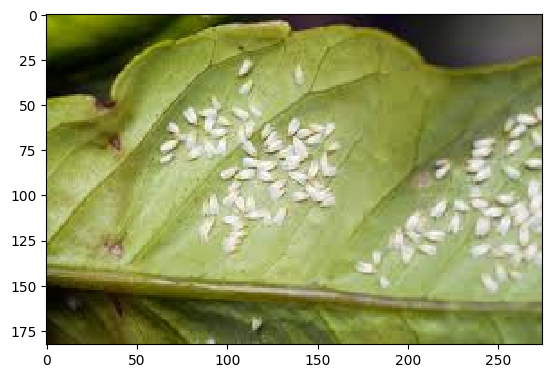

In [27]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/kaggle/input/chili-plant-disease/test/whitefly/whiteflya11.jpg')
plt.imshow(img, interpolation='nearest')
plt.show()

In [28]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


3

In [29]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_testc)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(Y_testc,axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


[[ 8  0  0  1  1]
 [ 3  5  0  2  0]
 [ 0  3  4  3  0]
 [ 0  0  0 10  0]
 [ 0  5  1  2  2]]


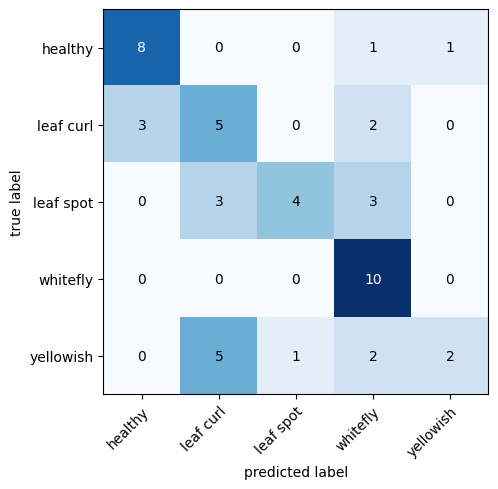

In [30]:
cm = confusion_matrix(y_true,pred)
print(cm)
from mlxtend.plotting import plot_confusion_matrix
ax = plot_confusion_matrix(conf_mat=cm,figsize=(5,5),class_names=labelsc)
plt.show()

In [31]:
from sklearn.metrics import classification_report
cr = classification_report(y_true,pred,target_names=labelsc)
print(cr)

              precision    recall  f1-score   support

     healthy       0.73      0.80      0.76        10
   leaf curl       0.38      0.50      0.43        10
   leaf spot       0.80      0.40      0.53        10
    whitefly       0.56      1.00      0.71        10
   yellowish       0.67      0.20      0.31        10

    accuracy                           0.58        50
   macro avg       0.63      0.58      0.55        50
weighted avg       0.63      0.58      0.55        50



In [32]:
model.save('chillicrops.keras')